# Introduction

In [1]:
"""
What? NLP analysis of some pdf files. This is step#1

The goal is to to analyze Microsoft’s earnings transcripts in pre- and post-Satya Nadella days to extract insights
about how the company’s philosophy and strategy evolved over time. The goal of step#1 is to read-in the file
and save a cleaned version of it ready to be used by NLP.

Reference: https://mikechoi90.medium.com/investigating-microsofts-transformation-under-satya-nadella-f49083294c35
"""

# Import libraries

In [2]:
import text_preprocessing_utils as tpu
import pickle
import os

# Extracting Text from PDF files

In [3]:
"""
I retrieved Microsoft’s earnings transcripts in PDFs from Capital IQ API.
    3Q’07–2Q’14: 28 quarters of transcripts in the Steve Ballmer era
    3Q’14–2Q’21: 28 quarters of transcripts in the Satya Nadella era
These are all .pdf files
"""

'\nI retrieved Microsoft’s earnings transcripts in PDFs from Capital IQ API.\n\n    3Q’07–2Q’14: 28 quarters of transcripts in the Steve Ballmer era\n    3Q’14–2Q’21: 28 quarters of transcripts in the Satya Nadella era\n'

In [4]:
directory = r'..//Data/Transcripts'
msft_earnings_dict_orig = {}
for filename in os.listdir(directory):
    if filename.endswith(".pdf"):
        print("Reading file: " + filename[0:-4])
        msft_earnings_dict_orig[filename[0:-4]] = tpu.text_extractor(os.path.join('../Data/Transcripts', filename))
    else:
        continue

Reading file: msft_21q2
Reading file: msft_21q1
Reading file: msft_07q3
Reading file: msft_18q4
Reading file: msft_18q1
Reading file: msft_18q3
Reading file: msft_07q4
Reading file: msft_18q2
Reading file: msft_20q1
Reading file: msft_19q4
Reading file: msft_20q2
Reading file: msft_20q3
Reading file: msft_19q3
Reading file: msft_19q2
Reading file: msft_20q4
Reading file: msft_19q1
Reading file: msft_08q4
Reading file: msft_15q1
Reading file: msft_17q3
Reading file: msft_11q4
Reading file: msft_17q2
Reading file: msft_15q2
Reading file: msft_13q4
Reading file: msft_17q1
Reading file: msft_15q3
Reading file: msft_08q2
Reading file: msft_11q3
Reading file: msft_13q1
Reading file: msft_11q2
Reading file: msft_17q4
Reading file: msft_08q3
Reading file: msft_08q1
Reading file: msft_15q4
Reading file: msft_13q2
Reading file: msft_13q3
Reading file: msft_11q1
Reading file: msft_12q4
Reading file: msft_14q2
Reading file: msft_14q3
Reading file: msft_16q1
Reading file: msft_16q3
Reading file: ms

# Text Preprocessing

In [5]:
"""
I then went through a pipeline of text preprocessing steps using NLTK and SpaCy:
    [1] Removed punctuations and numbers
    [2] Removed stopwords
    [3] Lemmatization
    [4] Corrected spelling errors
    [5] Removed people’s names
    
The text are large so it takes some times to process them.
"""

'\nI then went through a pipeline of text preprocessing steps using NLTK and SpaCy:\n    [1] Removed punctuations and numbers\n    [2] Removed stopwords\n    [3] Lemmatization\n    [4] Corrected spelling errors\n    [5] Removed people’s names\n'

In [6]:
# Making a copy so to leave the original untouched
msft_earnings_dict = msft_earnings_dict_orig.copy()

In [7]:
# Check the keys
msft_earnings_dict.keys()

dict_keys(['msft_21q2', 'msft_21q1', 'msft_07q3', 'msft_18q4', 'msft_18q1', 'msft_18q3', 'msft_07q4', 'msft_18q2', 'msft_20q1', 'msft_19q4', 'msft_20q2', 'msft_20q3', 'msft_19q3', 'msft_19q2', 'msft_20q4', 'msft_19q1', 'msft_08q4', 'msft_15q1', 'msft_17q3', 'msft_11q4', 'msft_17q2', 'msft_15q2', 'msft_13q4', 'msft_17q1', 'msft_15q3', 'msft_08q2', 'msft_11q3', 'msft_13q1', 'msft_11q2', 'msft_17q4', 'msft_08q3', 'msft_08q1', 'msft_15q4', 'msft_13q2', 'msft_13q3', 'msft_11q1', 'msft_12q4', 'msft_14q2', 'msft_14q3', 'msft_16q1', 'msft_16q3', 'msft_09q4', 'msft_14q1', 'msft_16q2', 'msft_10q4', 'msft_12q2', 'msft_09q1', 'msft_14q4', 'msft_10q1', 'msft_12q3', 'msft_12q1', 'msft_10q3', 'msft_09q2', 'msft_09q3', 'msft_16q4', 'msft_10q2'])

# Remove line breaks, punctuations, and numbers

In [8]:
msft_earnings_dict_v2 = tpu.text_preprocessing_pipeline_1(msft_earnings_dict)

msft_21q2
msft_21q1
msft_07q3
msft_18q4
msft_18q1
msft_18q3
msft_07q4
msft_18q2
msft_20q1
msft_19q4
msft_20q2
msft_20q3
msft_19q3
msft_19q2
msft_20q4
msft_19q1
msft_08q4
msft_15q1
msft_17q3
msft_11q4
msft_17q2
msft_15q2
msft_13q4
msft_17q1
msft_15q3
msft_08q2
msft_11q3
msft_13q1
msft_11q2
msft_17q4
msft_08q3
msft_08q1
msft_15q4
msft_13q2
msft_13q3
msft_11q1
msft_12q4
msft_14q2
msft_14q3
msft_16q1
msft_16q3
msft_09q4
msft_14q1
msft_16q2
msft_10q4
msft_12q2
msft_09q1
msft_14q4
msft_10q1
msft_12q3
msft_12q1
msft_10q3
msft_09q2
msft_09q3
msft_16q4
msft_10q2


# Tokenization, correct spelling errors, remove stopwords, lemmatization, remove people's names

In [9]:
msft_earnings_dict_v3 = tpu.text_preprocessing_pipeline_2(msft_earnings_dict_v2)

msft_21q2
msft_21q1
msft_07q3
msft_18q4
msft_18q1
msft_18q3
msft_07q4
msft_18q2
msft_20q1
msft_19q4
msft_20q2
msft_20q3
msft_19q3
msft_19q2
msft_20q4
msft_19q1
msft_08q4
msft_15q1
msft_17q3
msft_11q4
msft_17q2
msft_15q2
msft_13q4
msft_17q1
msft_15q3
msft_08q2
msft_11q3
msft_13q1
msft_11q2
msft_17q4
msft_08q3
msft_08q1
msft_15q4
msft_13q2
msft_13q3
msft_11q1
msft_12q4
msft_14q2
msft_14q3
msft_16q1
msft_16q3
msft_09q4
msft_14q1
msft_16q2
msft_10q4
msft_12q2
msft_09q1
msft_14q4
msft_10q1
msft_12q3
msft_12q1
msft_10q3
msft_09q2
msft_09q3
msft_16q4
msft_10q2


# Remove frequently used words that have no information value

In [10]:
msft_earnings_dict_v4 = tpu.remove_custom_stopwords_unigrams(msft_earnings_dict_v3)

msft_21q2
msft_21q1
msft_07q3
msft_18q4
msft_18q1
msft_18q3
msft_07q4
msft_18q2
msft_20q1
msft_19q4
msft_20q2
msft_20q3
msft_19q3
msft_19q2
msft_20q4
msft_19q1
msft_08q4
msft_15q1
msft_17q3
msft_11q4
msft_17q2
msft_15q2
msft_13q4
msft_17q1
msft_15q3
msft_08q2
msft_11q3
msft_13q1
msft_11q2
msft_17q4
msft_08q3
msft_08q1
msft_15q4
msft_13q2
msft_13q3
msft_11q1
msft_12q4
msft_14q2
msft_14q3
msft_16q1
msft_16q3
msft_09q4
msft_14q1
msft_16q2
msft_10q4
msft_12q2
msft_09q1
msft_14q4
msft_10q1
msft_12q3
msft_12q1
msft_10q3
msft_09q2
msft_09q3
msft_16q4
msft_10q2


# Bigrams 

In [ ]:
"""
The key term here is an “n-gram” – a sequence of n words that appear consecutively. One way to create them is to use
TF-IDF. The problem with n-grams is that there are so many potential ones out there. 
"""

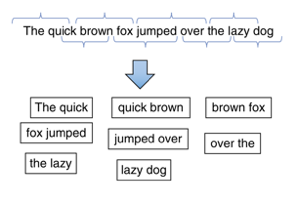

In [11]:
msft_earnings_dict_v3_copy = msft_earnings_dict_v3.copy()

In [12]:
msft_earnings_dict_bi = tpu.create_bigrams(msft_earnings_dict_v3_copy)

msft_21q2
msft_21q1
msft_07q3
msft_18q4
msft_18q1
msft_18q3
msft_07q4
msft_18q2
msft_20q1
msft_19q4
msft_20q2
msft_20q3
msft_19q3
msft_19q2
msft_20q4
msft_19q1
msft_08q4
msft_15q1
msft_17q3
msft_11q4
msft_17q2
msft_15q2
msft_13q4
msft_17q1
msft_15q3
msft_08q2
msft_11q3
msft_13q1
msft_11q2
msft_17q4
msft_08q3
msft_08q1
msft_15q4
msft_13q2
msft_13q3
msft_11q1
msft_12q4
msft_14q2
msft_14q3
msft_16q1
msft_16q3
msft_09q4
msft_14q1
msft_16q2
msft_10q4
msft_12q2
msft_09q1
msft_14q4
msft_10q1
msft_12q3
msft_12q1
msft_10q3
msft_09q2
msft_09q3
msft_16q4
msft_10q2


In [13]:
msft_earnings_dict_bi_v2 = tpu.remove_custom_stopwords_bigrams(msft_earnings_dict_bi)

msft_21q2
msft_21q1
msft_07q3
msft_18q4
msft_18q1
msft_18q3
msft_07q4
msft_18q2
msft_20q1
msft_19q4
msft_20q2
msft_20q3
msft_19q3
msft_19q2
msft_20q4
msft_19q1
msft_08q4
msft_15q1
msft_17q3
msft_11q4
msft_17q2
msft_15q2
msft_13q4
msft_17q1
msft_15q3
msft_08q2
msft_11q3
msft_13q1
msft_11q2
msft_17q4
msft_08q3
msft_08q1
msft_15q4
msft_13q2
msft_13q3
msft_11q1
msft_12q4
msft_14q2
msft_14q3
msft_16q1
msft_16q3
msft_09q4
msft_14q1
msft_16q2
msft_10q4
msft_12q2
msft_09q1
msft_14q4
msft_10q1
msft_12q3
msft_12q1
msft_10q3
msft_09q2
msft_09q3
msft_16q4
msft_10q2


# Pickle the transcript corpus

In [ ]:
"""
Saving the post-process files
"""

In [14]:
with open('cleaned_corpus.pickle', 'wb') as file:
    pickle.dump(msft_earnings_dict_v4, file)

In [15]:
with open('cleaned_corpus_bi.pickle', 'wb') as file:
    pickle.dump(msft_earnings_dict_bi_v2, file)